In [221]:
%run ./Load_Wine_data.ipynb

Red (1599, 12)
White (4898, 12)
Total (6497, 13)


In [222]:
df_total.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [223]:
test_var = ['fixed acidity']

# Estimativa de valor médio da fixed acidity

In [224]:
n=200
print('Acidez media: %.2f'%df_total[test_var].mean())
print('\t1)Preço médio amostral (',n,'): %.2f'%df_total.sample(n)[test_var].mean())
print('\t2)Preço médio amostral (',n,'): %.2f'%df_total.sample(n)[test_var].mean())
print('\t3)Preço médio amostral (',n,'): %.2f'%df_total.sample(n)[test_var].mean())

Acidez media: 7.22
	1)Preço médio amostral ( 200 ): 7.18
	2)Preço médio amostral ( 200 ): 7.27
	3)Preço médio amostral ( 200 ): 7.07


# Calculando a distribuição do valor médio da população para diversos sorteios de amostras.

In [225]:
 train_perc = 0.8
 # rows = df_total.describe()['fixed acidity']['count']
 n_rows = df_total.shape[0]
 train_data = round(perc_test * rows)
 train_data

5198

Valor médio da amostra  :  7.216514249999999
Valor médio da população:  7.215307064799138
Erro padrão da amostra  :  0.09034733987194918
Erro padrão estimado    :  0.09166465495231997


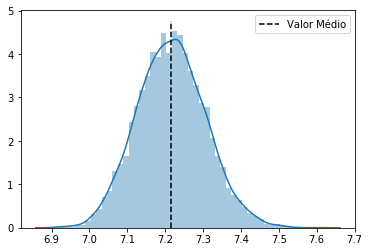

In [226]:
n_test = 10000
n = 200
mean_values = []
for i in range(n_test):
    mean_values.append(df_total.sample(n)[test_var].mean())
ref_mean_samples = np.array(mean_values)

print('Valor médio da amostra  : ', ref_mean_samples.mean())
print('Valor médio da população: ', np.array(df_total[test_var]).mean())
print('Erro padrão da amostra  : ', ref_mean_samples.std())
print('Erro padrão estimado    : ', np.array(df_total[test_var]).std() / np.sqrt(n))

# Plot
ax = sns.distplot(ref_mean_samples)
ax.plot([df_total[test_var].mean(), df_total[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()



# Visualizando o impacto do tamanho da amostra para a estimativa do valor médio.


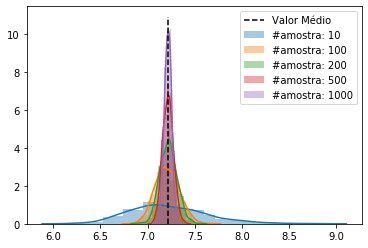

In [227]:
n_test = 1000

for ntrial in [10, 100, 200, 500, 1000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(df_total.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#amostra: %i'%ntrial)
ax.plot([df_total[test_var].mean(), df_total[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()




# Visualizando o impacto da quantidade de testes para a estimativa do valor médio da população.


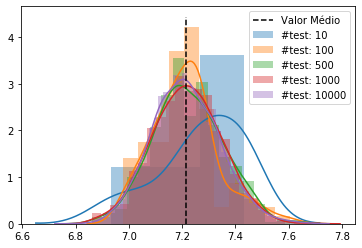

In [228]:
ntrial = 100

for n_test in [10, 100, 500, 1000, 10000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(df_total.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#test: %i'%n_test)
ax.plot([df_total[test_var].mean(), df_total[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()

Valor medio populacao :  [7.21530706]
Media amostral        : 7.216514249999999
Intervalo de confianca: [[7.18378244]
 [7.24683169]]


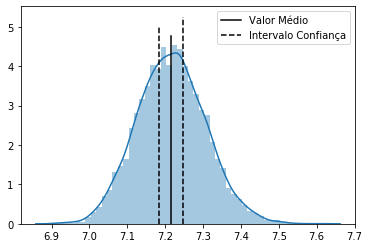

In [229]:
mean_val = df_total[test_var].mean()
std_error = df_total[test_var].std() / np.sqrt(df_total.shape[0])
ci = (mean_val - std_error * 1.96, mean_val + std_error * 1.96)


print('Valor medio populacao : ',np.array(mean_val))
print('Media amostral        :', np.array(ref_mean_samples.mean()))
print('Intervalo de confianca:',np.array(ci))

ax = sns.distplot(ref_mean_samples)
ax.plot([mean_val, mean_val], ax.axis()[2:], '-k', label='Valor Médio')
ax.plot([ci[0], ci[0]], ax.axis()[2:], '--k', label='Intervalo Confiança')
ax.plot([ci[1], ci[1]], ax.axis()[2:], '--k',)
ax.legend()



# Teste de Hipoteses

## Por Intervalo de Confianca

In [230]:
n_test = 200
ntrial = 200 # tamanho da amostra
data = df_total
mean_values = []
conf_values = []
for i in range(n_test):
    data_sample = data.sample(ntrial)[test_var]
    mean_values.append(data_sample.mean())
    standard_error = data_sample.std() / np.sqrt(ntrial)
    conf_values.append([standard_error*1.96, standard_error*-1.96])

mean_values = np.array(mean_values)
conf_values = np.array(conf_values).T 
idx = ((data[test_var].mean() < (mean_values - conf_values[0])) |  #?????????????????
       (data[test_var].mean() > (mean_values + conf_values[1])))
x_trials = np.arange(n_test)

print('Número de sorteios fora do I.C.   : ', idx.sum(), 'em', idx.shape[0])
print('Proporção de sorteios fora do I.C.: %.1f'%(idx.sum()/idx.shape[0] * 100),'%')

# Plot
plt.figure(figsize=(12,4))
plt.errorbar(x_trials, mean_values, yerr=conf_values, marker='o')
plt.errorbar(x_trials[idx], mean_values[idx], yerr=conf_values[:, idx],
             marker='*',color='r', linestyle='', label='Fora do I.C.')
plt.plot([0, n_test], [data[test_var].mean(), data[test_var].mean()],
        '-k',lw=3, label='Valor Médio')
plt.xlabel('Sorteio')
plt.ylabel(test_var)
plt.legend()

ValueError: operands could not be broadcast together with shapes (200,1) (2,200) 

In [ ]:
mean_values.shape

# Regressão Logística

In [232]:
class_var = ['fixed acidity']
target_var = ['quality']

n_classes = data[target_var].nunique().values[0]

x_data = df_total[class_var].copy().values
y_data = df_total[target_var].copy().values

if n_classes ==2:

    y_data[y_data <= 5] = 0
    x_data[z_data  > 5] = 1
    
cat_encoder = preprocessing.OrdinalEncoder()
cat_encoder.fit(y_data)
y_data = cat_encoder.transform(y_data)
y_data = y_data.reshape(-1)

model = lm.LogisticRegression(solver='lbfgs')
model.fit(x_data, y_data)

if n_classes == 2:
    y_hat = model.predict_proba(x_data)[:,1]
else:
    y_hat = model.predict_proba(x_data)
    
    

C:\Users\OctavioLuisElliotFre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [234]:
y_hat

array([[4.66185906e-03, 3.35421992e-02, 3.23695234e-01, ...,
        1.68016212e-01, 3.08350059e-02, 6.57796810e-04],
       [4.18266597e-03, 3.26430338e-02, 3.04533061e-01, ...,
        1.75745774e-01, 3.98314963e-02, 9.81768448e-04],
       [5.48708130e-03, 3.47451830e-02, 3.53623153e-01, ...,
        1.55386749e-01, 2.04685536e-02, 3.47977967e-04],
       ...,
       [4.18266597e-03, 3.26430338e-02, 3.04533061e-01, ...,
        1.75745774e-01, 3.98314963e-02, 9.81768448e-04],
       [3.92376286e-03, 3.20785207e-02, 2.93533577e-01, ...,
        1.79975863e-01, 4.60178988e-02, 1.23184949e-03],
       [3.98750489e-03, 3.22232430e-02, 2.96287153e-01, ...,
        1.78933967e-01, 4.43928076e-02, 1.16407610e-03]])